In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("historical_data (1).csv")
df.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12


In [17]:
df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [18]:
df.shape

(211224, 16)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [20]:
df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [21]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["date"] = df["Timestamp"].dt.date
df["hour"] = df["Timestamp"].dt.hour


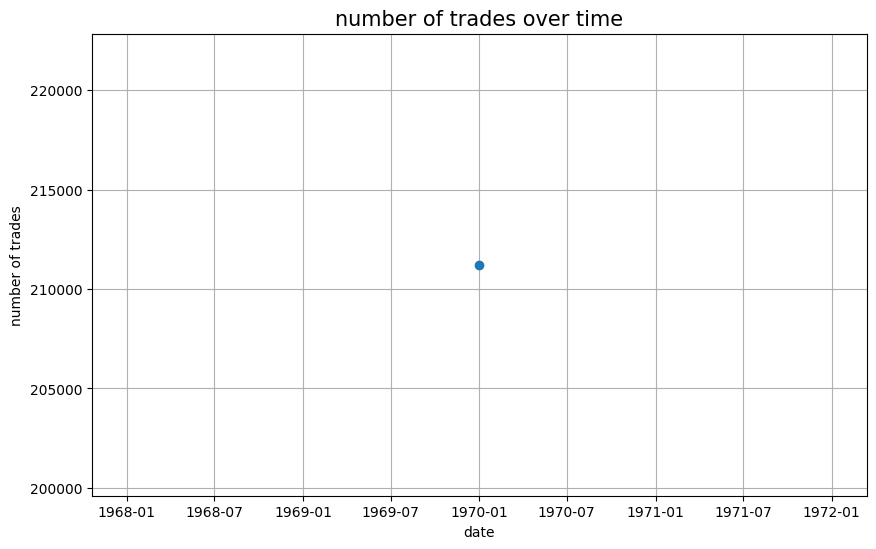

In [32]:
plt.figure(figsize = (10,6))
df.groupby("date").size().plot(kind = "line", marker = "o")
plt.title("number of trades over time", fontsize = 15)
plt.xlabel("date")
plt.ylabel("number of trades")
plt.grid(True)
plt.show()


X-axis date: It represents the time years around 1968-1972

Y-axis number of trades: It shows how many trades happened between 200000 and 220000

Blue dot: Represents one data point where around 210000 trades happened at a particular date


/tmp/ipython-input-2504782127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Side" ,data = df, palette = "coolwarm")


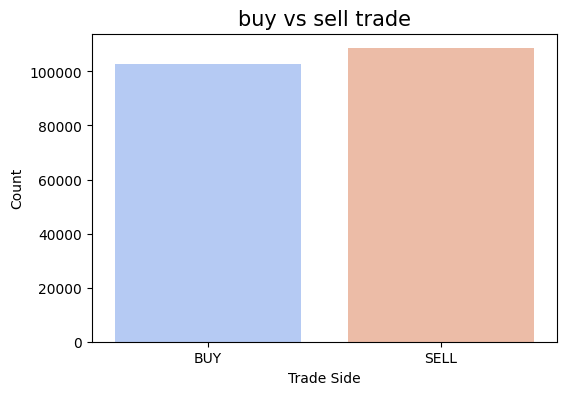

In [23]:
plt.figure(figsize= (6,4))
sns.countplot(x = "Side" ,data = df, palette = "coolwarm")
plt.title("buy vs sell trade", fontsize = 15)
plt.xlabel("Trade Side")
plt.ylabel("Count")
plt.show()

X-axis Trade Side: Represents the type of trade BUY or SELL  
Y-axis Count: Represents the number of trades for each side.  

The number of SELL trades is slightly higher than the number of BUY trades

Both sides have trade counts above 100000 showing a relatively balanced level of market activity.

/tmp/ipython-input-3810257217.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Size USD", y= "Coin", data = avg_size, palette = "viridis" )


<Figure size 1000x800 with 0 Axes>

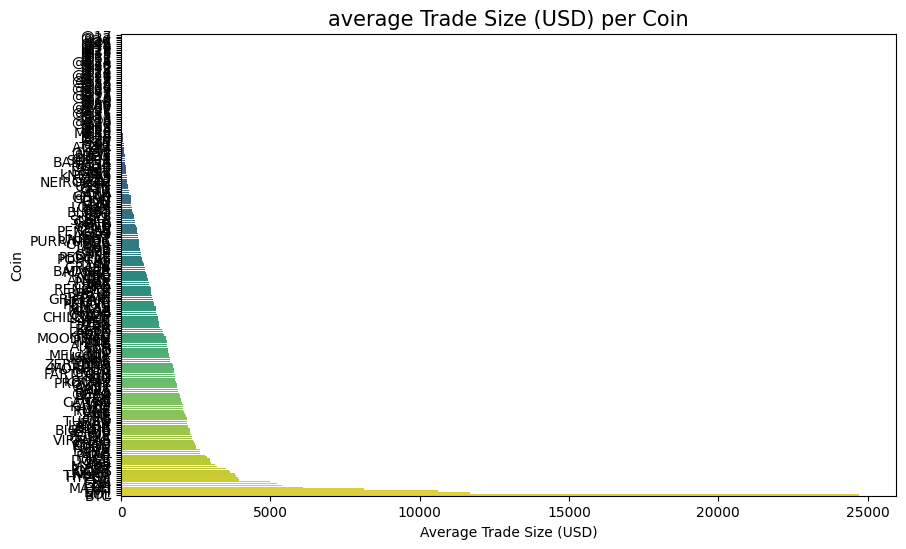

In [35]:
plt.figure(figsize = (10,8))
avg_size = df.groupby("Coin")["Size USD"].mean().reset_index().sort_values("Size USD", ascending = True)
plt.figure(figsize = (10,6))
sns.barplot(x = "Size USD", y= "Coin", data = avg_size, palette = "viridis" )
plt.title("average Trade Size (USD) per Coin", fontsize = 15)
plt.xlabel("Average Trade Size (USD)")
plt.ylabel("Coin")
plt.show()

Y-axis Coin: Represents the different coins being traded.

X-axis Average Trade Size in USD: Represents the average dollar value of trades for each coin.  


In [25]:
df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'hour'],
      dtype='object')

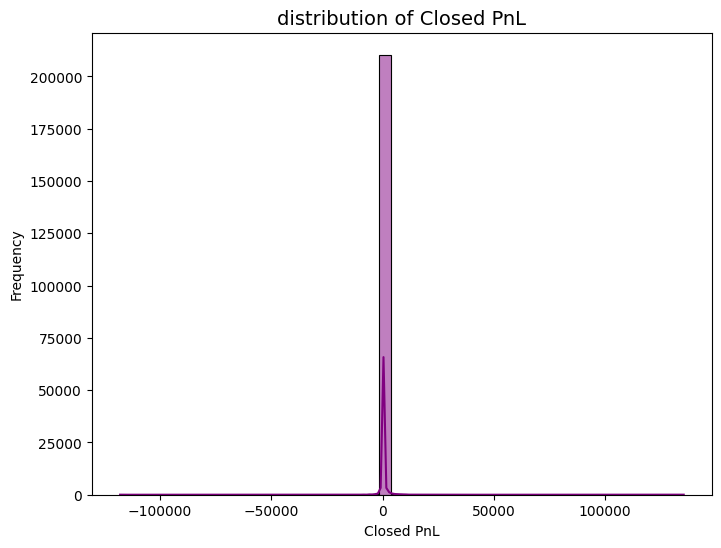

In [26]:
plt.figure(figsize= (8,6))
sns.histplot(df["Closed PnL"],bins =50, kde= True, color= "purple")
plt.title("distribution of Closed PnL", fontsize = 14)
plt.xlabel("Closed PnL")
plt.ylabel("Frequency")
plt.show()

X-axis Closed PnL: Represents the profit or loss value from trades. Negative values indicate losses, while positive values indicate profits.  
Y-axis Frequency: Represents how often those PnL values occurred.  

Observation:  
The vast majority of trades have PnL values very close to 0, which is why there is a tall spike around the center.  

A smaller number of trades have very large profits or losses both positive and negative shown as the stretched-out tails on both sides.
  
This pattern suggests that most trades are small in profit or loss, while only a few trades result in extreme outcomes


/tmp/ipython-input-3491142742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Side", y= "Closed PnL", data = df, palette = "Set2")


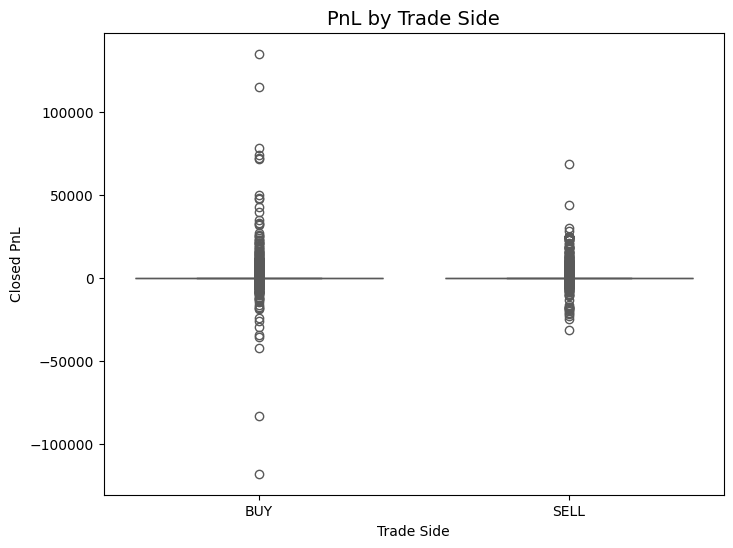

In [27]:
plt.figure(figsize = (8,6))
sns.boxplot(x = "Side", y= "Closed PnL", data = df, palette = "Set2")

plt.title("PnL by Trade Side", fontsize = 14)
plt.xlabel("Trade Side")
plt.ylabel("Closed PnL")
plt.show()

X-axis Trade Side: Represents whether the trade was a BUY or SELL.  
Y-axis Closed PnL: Represents the profit or loss value from trades.

Observation:
Both BUY and SELL trades have PnL values spread widely, with most trades clustered around 0 PnL

The presence of many outliers dots far from the box indicates that a few trades resulted in very large profits or losses.

The distributions for BUY and SELL are similar, showing no major difference in profit/loss behavior between the two sides.


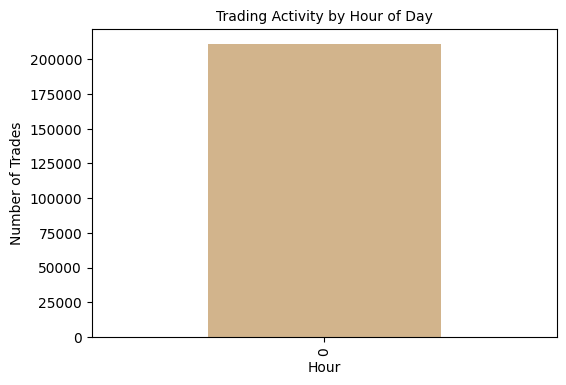

In [36]:
plt.figure(figsize = (6,4))
df.groupby("hour").size().plot(kind = "bar", color = "tan")
plt.title("Trading Activity by Hour of Day", fontsize = 10)
plt.xlabel("Hour")
plt.ylabel("Number of Trades")
plt.show()

X-axis Hour: Represents the time of day in hours.  
Y-axis Number of Trades: Shows how many trades occurred during that hour.

Observation:  

Almost all trading activity is concentrated in a single hour.  
This suggests that the dataset may represent trading activity happening in a very short time window e.g., bulk orders executed at a fixed time rather than throughout the day.

  - Other hours show little to no trading activity, indicating that trading is not evenly spread out.

In simple terms: Trades mainly happen during one specific hour of the day, not continuously across all hours.